# Self-consistency checks for W51-E

Goal: Determine why there are PSF artifacts remaining after a deep clean and self-calibration.

In [1]:
%matplotlib inline
from casatasks import tclean, ft, clearcal, uvsub, split
from casatools import ms, table, msmetadata
from spectral_cube import SpectralCube
import numpy as np
from astropy import units as u, visualization
from astropy.visualization import simple_norm
import pylab as pl
visualization.quantity_support()
ms = ms()
msmd = msmetadata()
tb = table()

In [2]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L


In [3]:
original_ms = "W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_selfcal.ms"
experiment_ms_1 = "experiment_w51eb3_1.ms"
experiment_ms_2 = "experiment_w51eb3_2.ms"

In [5]:
for expt in (experiment_ms_1, experiment_ms_2):
    if not os.path.exists(expt):
        split(vis=original_ms,
              outputvis=expt,
              datacolumn='corrected',)

In [6]:
finaliter_prefix = "imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter"
for suffix in (".model.tt0",".model.tt1"):
    assert os.path.exists(finaliter_prefix+suffix)

In [7]:
import warnings
import spectral_cube
warnings.simplefilter('ignore', spectral_cube.utils.BeamWarning)
warnings.simplefilter('ignore', spectral_cube.utils.StokesWarning)

## Zoom in on W51 e2

W51 e2 contains W51 e2e and W51 e2w, which are side-by-side hot-core and HCHII region.

This is the most obvious case of a clear difference between tt0 and tt1.

There is a clear oversubtraction of the tt0 model at W51e2w, at the ~1 mJy level, that doesn't make much sense (why would clean have put extra components there?)

Text(0.5, 1.0, 'model.tt1')

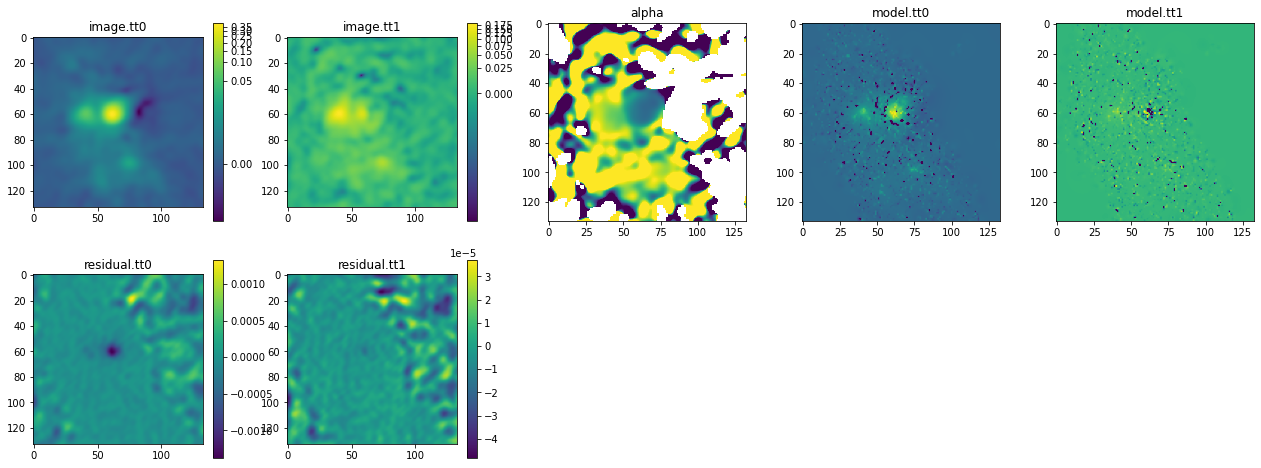

In [28]:
cutoutregion = 'fk5; box(19:23:43.90,+14:30:34.8,5",5")'
pl.figure(figsize=(22,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

## Look to the north of this source

This is where artifacts are clear, particularly in the residual.

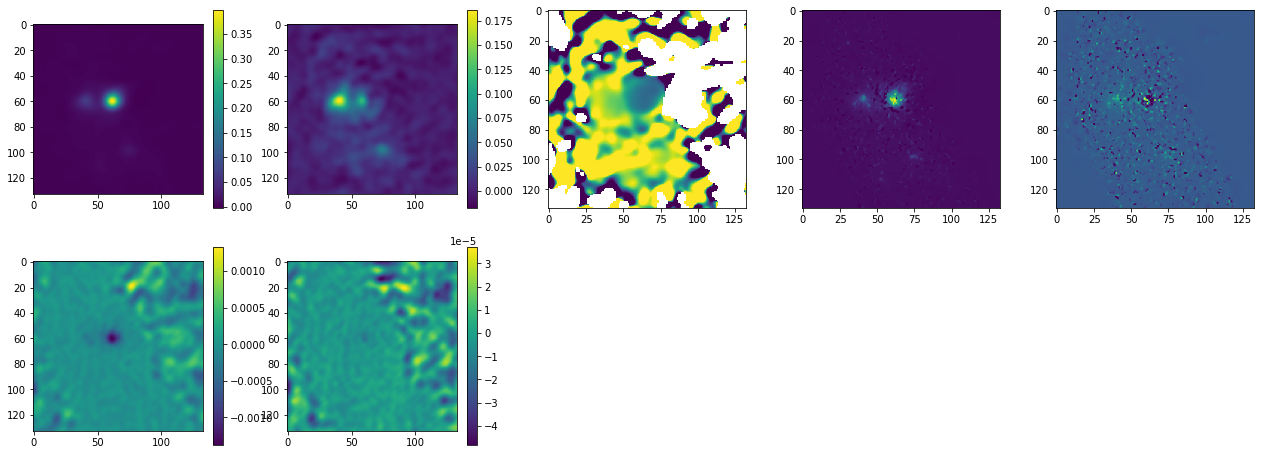

In [29]:
cutoutregion_ = cutoutregion
cutoutregion = 'fk5; box(19:23:43.90,+14:30:59.8,15",15")'
pl.figure(figsize=(22,8))
image_ = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
imagett1_ = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
residual_ = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
residualtt1_ = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
alpha_ = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
model_ = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='asinh', max_percent=99.995, min_percent=1));
modeltt1_ = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='asinh', max_percent=99.995, min_percent=1));
cutoutregion = cutoutregion_

In [10]:
def restore_modelcolumn(vis, use_tclean=True):
    if use_tclean:
        tclean(vis=vis, selectdata=True, field="W51-E",
           datacolumn="corrected",
           imagename=finaliter_prefix,
           imsize=[4800,  4800], cell=['0.0375arcsec',  '0.0375arcsec'],
           phasecenter="ICRS 290.934083333deg 14.5081943683deg", stokes="I",
           projection="SIN", specmode="mfs", outframe="LSRK", veltype="radio",
           restfreq=[], interpolation="linear", gridder="mosaic", mosweight=True,
           deconvolver="mtmfs", scales=[0,  3,  9], nterms=2, restoration=True,
           weighting="briggs", robust=0, niter=0,  threshold="0.15mJy",
           interactive=False, usemask="user", verbose=True, restart=True,
           savemodel="modelcolumn", calcres=True, calcpsf=False)
    else:
        ft(vis=vis,
           model=[finaliter_prefix+'.model.tt0',
                  finaliter_prefix+'.model.tt1'],
           nterms=2,
           usescratch=True)

In [18]:
image_path = "RestructuredImagingResults/W51-E/B3/manual_checks"
def image_field(vis, outname, field=4, overwrite=False):
    if overwrite:
        os.system(f'rm -r {image_path}/{outname}.*')
    elif os.path.exists(f'{image_path}/{outname}.image.tt0'):
        return
    tclean(vis=vis,
       field=str(field),
       imagename=f'{image_path}/{outname}',
       specmode='mfs',
       datacolumn='corrected',
       deconvolver='mtmfs',
       gridder='standard',
       imsize=[2000, 2000], cell=['0.06arcsec',  '0.06arcsec'],
       #startmodel=['imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt0',
       #            'imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt1'],
       #savemodel='modelcolumn',
       weighting='briggs',
       robust=0,
       nterms=2,
       niter=0,
      )

# Experiment 1: Use tclean to populate the model column

We populate the model column from the `.model.tt0` and `.model.tt1` images using tclean with the exact same parameters used for imaging (same gridder, same imsize, same phasecenter, etc).

We clearcal first to make sure we're really starting from scratch.

`experiment_ms_*` all have the final self-calibrated "corrected" data in their "data" column.

In [12]:
clearcal(experiment_ms_1)
restore_modelcolumn(experiment_ms_1, use_tclean=True)

Verify that the model is populated by showing some values.  As long as this image is not uniform, the model is populated.

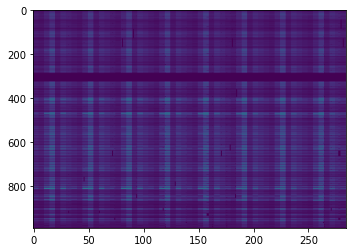

In [13]:
ms.open(experiment_ms_1); ms.selectinit(12); mod_restore = ms.getdata(['data', 'corrected_data', 'model_data'], ifraxis=True); ms.close()
pl.imshow(np.abs(mod_restore['model_data'][0,0]))
pl.gca().set_aspect(0.2)

## uvsub

We uvsub the model from the data column (which is the self-calibrated data) to obtain a new residual image.  The residual should closely resemble the residual of the original cleaned image.

In [14]:
uvsub(experiment_ms_1)

Verify that the subtraction worked as expected:

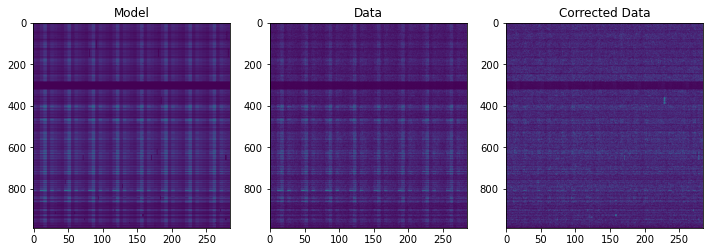

In [15]:
ms.open(experiment_ms_1); ms.selectinit(12); mod_sub = ms.getdata(['data', 'corrected_data', 'model_data'], ifraxis=True); ms.close()
pl.figure(figsize=(12,4))
pl.subplot(1,3,1).imshow(np.abs(mod_sub['model_data'][0,0])); pl.title("Model"); pl.gca().set_aspect(0.3)
pl.subplot(1,3,2).imshow(np.abs(mod_sub['data'][0,0])); pl.title("Data"); pl.gca().set_aspect(0.3)
pl.subplot(1,3,3).imshow(np.abs(mod_sub['corrected_data'][0,0])); pl.title("Corrected Data"); pl.gca().set_aspect(0.3)

Notably, there _is_ an interesting, bright residual in the corrected_data!  Maybe this is the source of the problem?

Next, we image the data in a few different fields.  field0 is the center pointing, field4 is an offset pointing.

In [16]:
eximname = 'experiment_tcleanrestore_uvsub_field4'
image_field(experiment_ms_1, eximname, field=4)

In [35]:
for field in range(15):
    eximname = f'experiment_tcleanrestore_uvsub_field{field}'
    try:
        image_field(experiment_ms_1, eximname, field=field, overwrite=False)
        print(eximname)
    except RuntimeError:
        continue

experiment_tcleanrestore_uvsub_field0
experiment_tcleanrestore_uvsub_field4
experiment_tcleanrestore_uvsub_field5
experiment_tcleanrestore_uvsub_field6
experiment_tcleanrestore_uvsub_field7
experiment_tcleanrestore_uvsub_field8
experiment_tcleanrestore_uvsub_field9


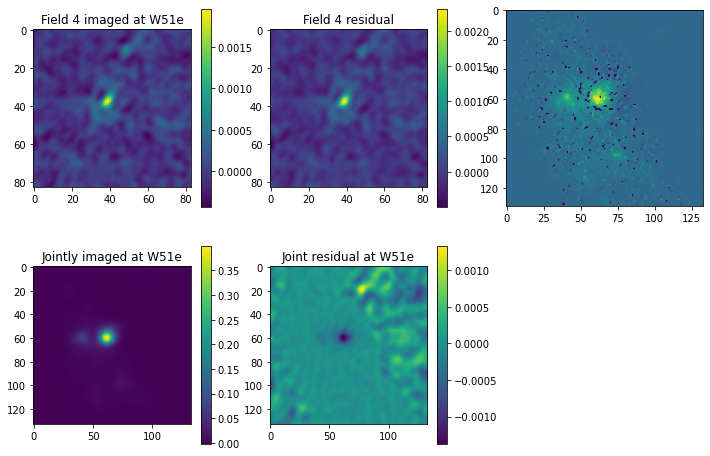

In [30]:
#cutoutregion = 'fk5; box(19:23:43.90,+14:30:34.8,10",10")'
eximname = 'experiment_tcleanrestore_uvsub_field4'
pl.figure(figsize=(12,8))
image_ = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,1);  pl.imshow(image_[0].value); pl.title("Field 4 imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
resid_ = SpectralCube.read(f'{image_path}/{eximname}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,2);  pl.imshow(resid_[0].value); pl.title("Field 4 residual"); pl.colorbar(mappable=pl.gca().images[0])
#model = SpectralCube.read(f'{image_path}/{eximname}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,3).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.subplot(2,3,4);  pl.imshow(image[0].value); pl.title("Jointly imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
pl.subplot(2,3,5);  pl.imshow(residual[0].value); pl.title("Joint residual at W51e"); pl.colorbar(mappable=pl.gca().images[0])

In [ ]:
eximname = 'experiment_tcleanrestore_uvsub_field0'
image_field(experiment_ms_1, eximname, field=0)

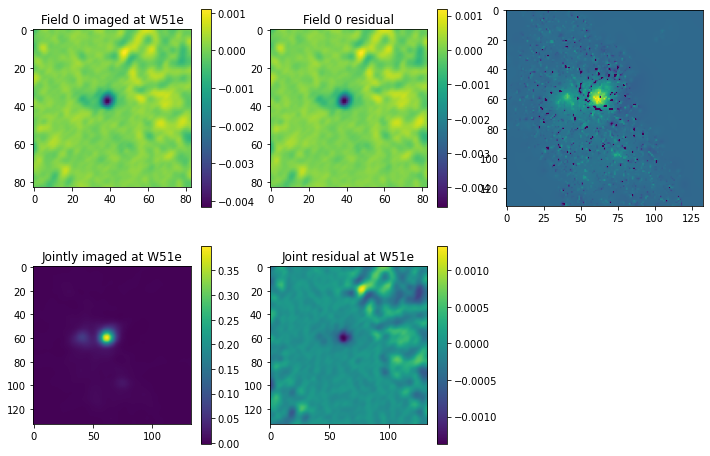

In [31]:
#cutoutregion = 'fk5; box(19:23:43.90,+14:30:34.8,10",10")'
eximname = 'experiment_tcleanrestore_uvsub_field0'
pl.figure(figsize=(12,8))
image_ = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,1);  pl.imshow(image_[0].value); pl.title("Field 0 imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
resid_ = SpectralCube.read(f'{image_path}/{eximname}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,2);  pl.imshow(resid_[0].value); pl.title("Field 0 residual"); pl.colorbar(mappable=pl.gca().images[0])
#model = SpectralCube.read(f'{image_path}/{eximname}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,3).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.subplot(2,3,4);  pl.imshow(image[0].value); pl.title("Jointly imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
pl.subplot(2,3,5);  pl.imshow(residual[0].value); pl.title("Joint residual at W51e"); pl.colorbar(mappable=pl.gca().images[0])

Text(0.5, 1.0, 'Field 4')

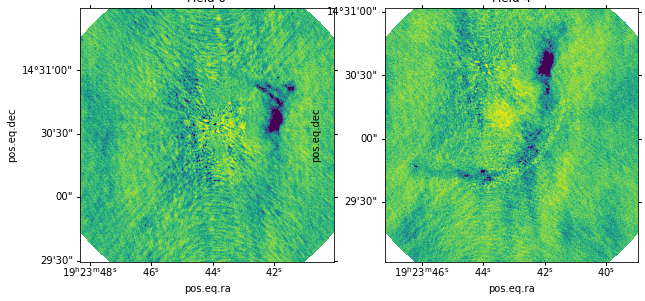

In [33]:
pl.figure(figsize=(10,5))
eximname = 'experiment_tcleanrestore_uvsub_field0'
f0 = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image')[0]
ax = pl.subplot(1,2,1, projection=f0.wcs); ax.imshow(f0.value, norm=simple_norm(f0.value, stretch='asinh', max_percent=99.9, min_percent=1)); pl.title("Field 0")
eximname = 'experiment_tcleanrestore_uvsub_field4'
f4 = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image')[0]
ax = pl.subplot(1,2,2, projection=f4.wcs); ax.imshow(f4.value, norm=simple_norm(f4.value, stretch='asinh', max_percent=99.9, min_percent=1)); pl.title("Field 4")

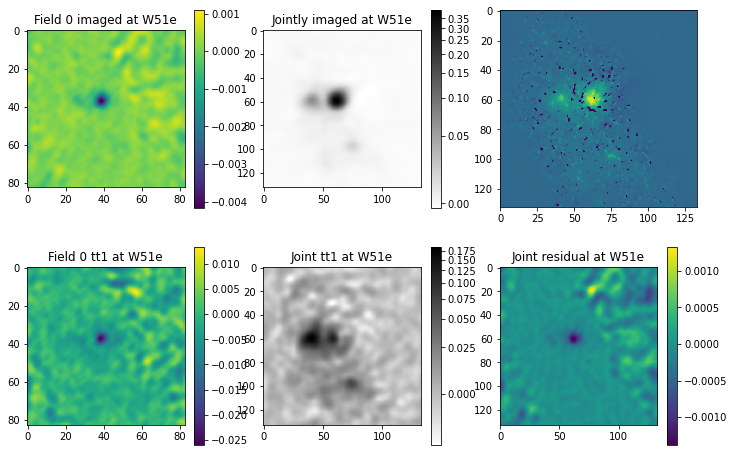

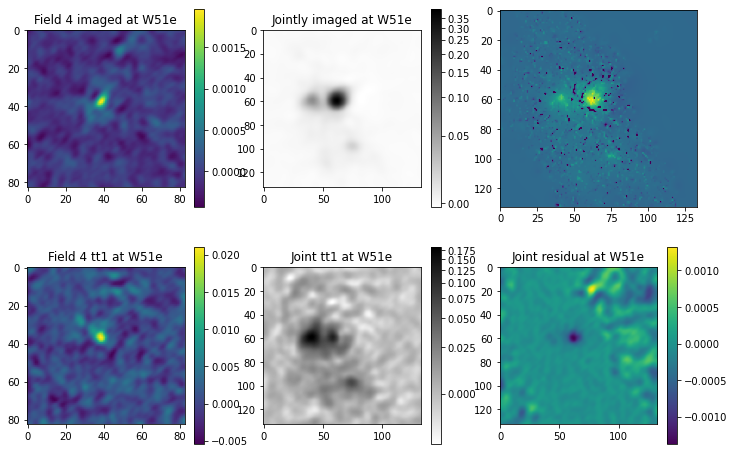

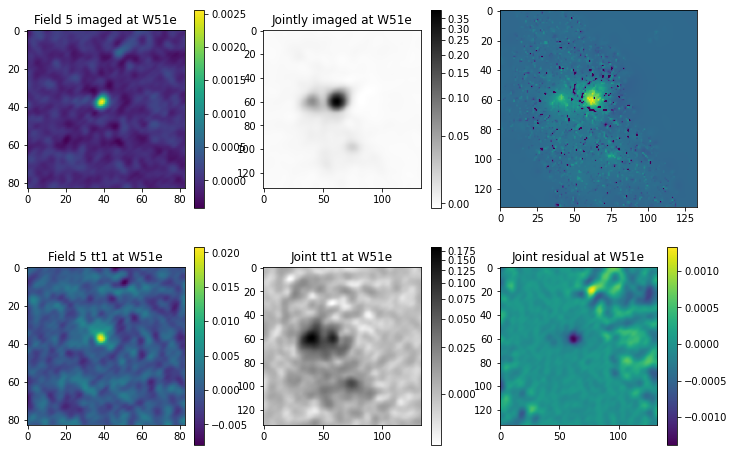

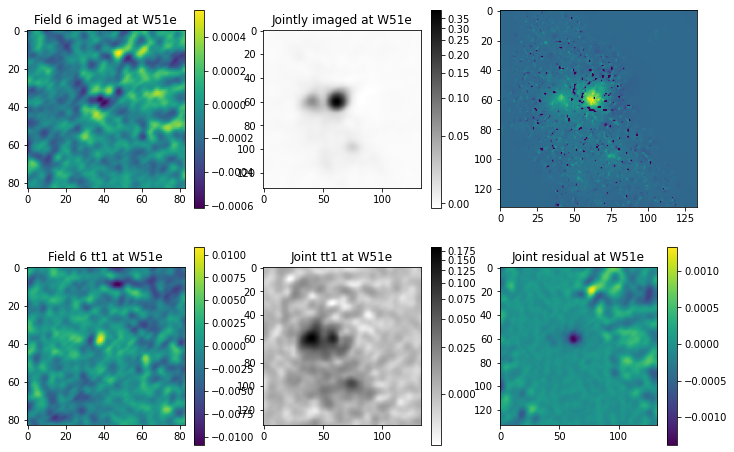

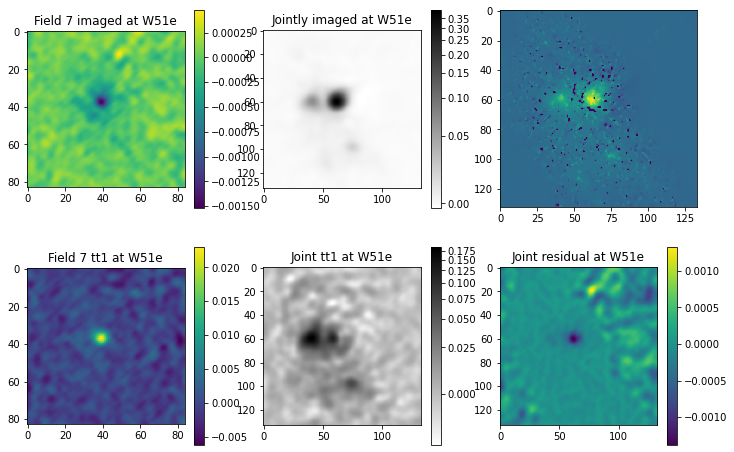

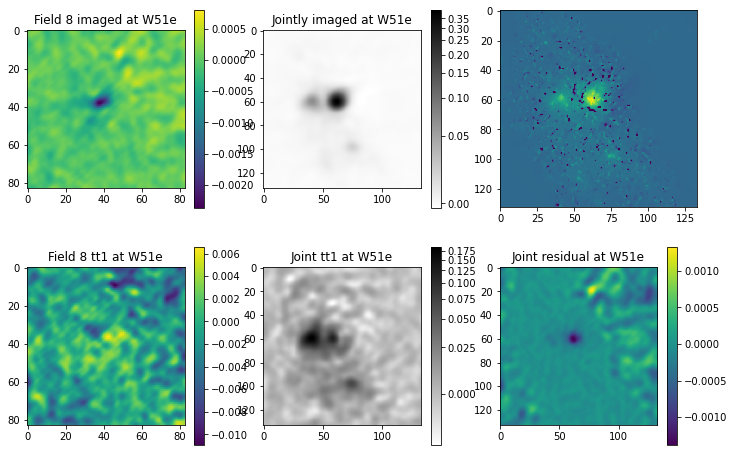

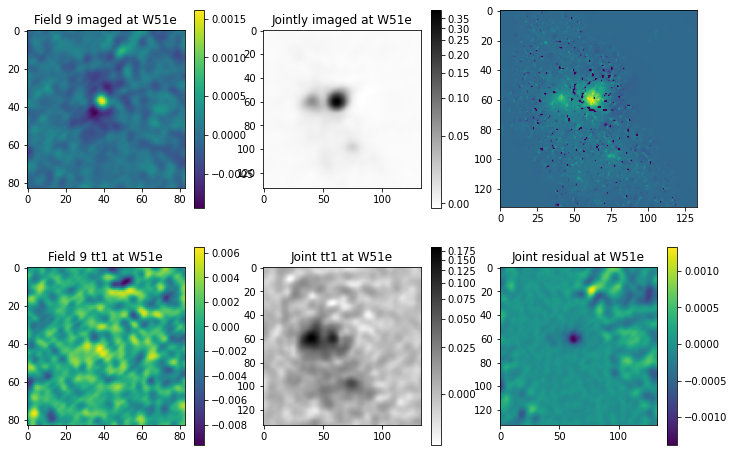

In [34]:
for field in range(10):
    #cutoutregion = 'fk5; box(19:23:43.90,+14:30:34.8,5",5")'
    eximname = f'experiment_tcleanrestore_uvsub_field{field}'
    if os.path.exists(f'{image_path}/{eximname}.image.tt0'):
        pl.figure(figsize=(12,8))
        image_ = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
        pl.subplot(2,3,1);  pl.imshow(image_[0].value); pl.title(f"Field {field} imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
        resid_ = SpectralCube.read(f'{image_path}/{eximname}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
        #pl.subplot(2,3,2);  pl.imshow(resid_[0].value); pl.title(f"Field {field} residual"); pl.colorbar(mappable=pl.gca().images[0])
        #model = SpectralCube.read(f'{image_path}/{eximname}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
        pl.subplot(2,3,3).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
        imagett1_ = SpectralCube.read(f'{image_path}/{eximname}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
        pl.subplot(2,3,4);  pl.imshow(imagett1_[0].value); pl.title(f"Field {field} tt1 at W51e"); pl.colorbar(mappable=pl.gca().images[0])
        pl.subplot(2,3,2);  pl.imshow(image[0].value, norm=simple_norm(image[0].value, stretch='asinh'), cmap='gray_r'); pl.title("Jointly imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
        pl.subplot(2,3,5);  pl.imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='asinh'), cmap='gray_r'); pl.title("Joint tt1 at W51e"); pl.colorbar(mappable=pl.gca().images[0])
        pl.subplot(2,3,6);  pl.imshow(residual[0].value); pl.title("Joint residual at W51e"); pl.colorbar(mappable=pl.gca().images[0])

# Next 

Next experiment: use `ft` instead of `tclean`.

In [ ]:
clearcal(experiment_ms_2)
restore_modelcolumn(experiment_ms_2, use_tclean=False)